# Data Cleaning Process

In [176]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\ZAK\Downloads\layoffs.csv")

In [178]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,03/06/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,03/06/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,03/06/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,03/06/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,03/03/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2356,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,02/09/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2361 non-null   object 
 1   location               2361 non-null   object 
 2   industry               2357 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1576 non-null   float64
 5   date                   2360 non-null   object 
 6   stage                  2355 non-null   object 
 7   country                2361 non-null   object 
 8   funds_raised_millions  2152 non-null   float64
dtypes: float64(3), object(6)
memory usage: 166.1+ KB


In [182]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised_millions
count,1621.000000,1576.000000,2152.000000
mean,238.358421,0.257917,822.454134
std,769.718801,0.255575,5593.961626
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,50.000000
50%,80.000000,0.170000,156.500000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000


In [454]:
# A few discoveries so far:

# Not sure about duplicates, but i will check and confirm. 
# First thing noticed is a number of null rows in the total_laid_off and percentage_laid_off columns but based on our objective, we are more likely to utilize the former column as we have no way of actually aggregating the percentage which would have been more usable. 
# The `date` column is set up as an 'object' and not an actual date data type. will change that. 
# Funds_raised_millions and total_laid_off are solid numbers so no need for them to be floats. Will make this change too to integer. 


In [184]:
# Duplicate check and clear out if any. 

pd.set_option('display.max_rows', 100)
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2356    False
2357     True
2358     True
2359     True
2360     True
Length: 2361, dtype: bool

In [186]:
pd.set_option('display.max_rows', 2500)
company_dupes = df.duplicated(subset=['company'])
company_dupes

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [188]:
df[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1492,Cazoo,London,Transportation,750.0,0.15,06/07/2022,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,02/09/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,11/28/2022,Unknown,Brazil,260.0


In [190]:
# As i did further analysis to understand the data more, i discovered that some rows are duplicated but also have null values in both total_laid_off and percentage_laid_off columns, so first will delete rows with NULLS in latter and then those with NULLS in the former. 

pd.set_option('display.max_rows', 100)
df.dropna(subset = ['percentage_laid_off'], inplace = True)

In [192]:
# We need to do accurate analysis and for this, it wont be possible with NULL data in the total_laid_off column so we get rid of those too. 

df.dropna(subset = ['total_laid_off'], inplace = True)

In [120]:
# the dataset we have below now has no nulls in both columns and is clear for duplicates removal 

df.drop_duplicates(inplace = True)
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,03/06/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,03/06/2023,Post-IPO,United States,525.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,03/03/2023,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,03/03/2023,Post-IPO,United States,317.0
11,Zscaler,SF Bay Area,Security,177.0,0.03,03/02/2023,Post-IPO,United States,148.0
...,...,...,...,...,...,...,...,...,...
2350,Help.com,Austin,Support,16.0,1.00,3/16/2020,Seed,United States,6.0
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,03/12/2020,Series C,United States,90.0


In [194]:
# whats next is a bit of standardization. 
# lets set right the date column now 

df['date'] = pd.to_datetime(df['date'])
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,2023-03-03,Post-IPO,United States,317.0
11,Zscaler,SF Bay Area,Security,177.0,0.03,2023-03-02,Post-IPO,United States,148.0
...,...,...,...,...,...,...,...,...,...
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2356,Blackbaud,Charleston,Other,500.0,0.14,NaT,Post-IPO,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2023-02-09,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,2020-03-30,Series A,Israel,45.0


In [196]:
# next, we will change data types of total_laid_off and funds_raised_millions to integer data types. 

df['total_laid_off'] = df['total_laid_off'].astype(int)

In [210]:
# for funds_raised_millions, there is still a few NULLS bit we do not want to get rid of these columns because we further minimize accuracy of our insights as we had already set total_laid_off and percentage_laid_off to have no no nulls since we will use these two mainly. 

# we fill the nulls in funds_raised_millions with 0 and then proceed with changing data type to int as this can only work if there are no nulls in the column. 

df['funds_raised_millions'] = df['funds_raised_millions'].fillna(0)

df['funds_raised_millions'] = df['funds_raised_millions'].astype(int)

In [212]:
# lets have a quick glimpse at our data set now. 

df.head(20)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500,0.05,2023-03-06,Post-IPO,Australia,210
1,SiriusXM,New York City,Media,475,0.08,2023-03-06,Post-IPO,United States,525
4,Loft,Sao Paulo,Real Estate,340,0.15,2023-03-03,Unknown,Brazil,788
5,Embark Trucks,SF Bay Area,Transportation,230,0.70,2023-03-03,Post-IPO,United States,317
11,Zscaler,SF Bay Area,Security,177,0.03,2023-03-02,Post-IPO,United States,148
14,Fittr,Pune,Fitness,30,0.11,2023-03-02,Series A,India,13
15,CNET,SF Bay Area,Media,12,0.10,2023-03-02,Acquired,United States,20
19,Thoughtworks,Chicago,Other,500,0.04,2023-03-01,Post-IPO,United States,748
20,iFood,Sao Paulo,Food,355,0.06,2023-03-01,Subsidiary,Brazil,2100
22,Waymo,SF Bay Area,Transportation,209,0.08,2023-03-01,Subsidiary,United States,5500


In [221]:
df.isnull().sum()

company                  0
location                 0
industry                 2
total_laid_off           0
percentage_laid_off      0
date                     1
stage                    3
country                  0
funds_raised_millions    0
dtype: int64

In [231]:
# finally, we still have a few nulls in industry, date and stage columns. 
# for industry and stage, we will fill all NULLS with 'Unknown' and for date, we will clear the row. 

df['industry'] = df['industry'].fillna('Unknown')
df['stage'] = df['stage'].fillna('Unknown')
df.dropna(subset = ['date'], inplace = True)

In [235]:
df.isnull().sum()

company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off      0
date                     0
stage                    0
country                  0
funds_raised_millions    0
dtype: int64

In [233]:
# lets reset our index to a proper rolling one. 

df.reset_index(drop = True)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500,0.05,2023-03-06,Post-IPO,Australia,210
1,SiriusXM,New York City,Media,475,0.08,2023-03-06,Post-IPO,United States,525
2,Loft,Sao Paulo,Real Estate,340,0.15,2023-03-03,Unknown,Brazil,788
3,Embark Trucks,SF Bay Area,Transportation,230,0.70,2023-03-03,Post-IPO,United States,317
4,Zscaler,SF Bay Area,Security,177,0.03,2023-03-02,Post-IPO,United States,148
...,...,...,...,...,...,...,...,...,...
1192,Panda Squad,SF Bay Area,Consumer,6,0.75,2020-03-13,Seed,United States,1
1193,Tamara Mellon,Los Angeles,Retail,20,0.40,2020-03-12,Series C,United States,90
1194,Yahoo,SF Bay Area,Consumer,1600,0.20,2023-02-09,Acquired,United States,6
1195,Hibob,Tel Aviv,HR,70,0.30,2020-03-30,Series A,Israel,45


#  Exploratory Data Analysis & Visualization. 

In [241]:
# Lets dig into the data and derive a few insights. 

In [448]:
# Firstly, which were the top 5 companies with the highest lay_offs. 

df.sort_values(by = 'total_laid_off', ascending = False).head(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
281,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,Post-IPO,United States,26
749,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,Post-IPO,United States,26000
681,Amazon,Seattle,Retail,10000,0.03,2022-11-16,Post-IPO,United States,108
314,Microsoft,Seattle,Other,10000,0.05,2023-01-18,Post-IPO,United States,1
39,Ericsson,Stockholm,Other,8500,0.08,2023-02-24,Post-IPO,Sweden,663


In [450]:
df[['total_laid_off', 'percentage_laid_off']].describe()

# From this, we discover that the average number and percentage of layoffs per company is 274 and approximately 22% respectively. 

,total_laid_off,percentage_laid_off
count,1197.000000,1197.00000
mean,273.743525,0.22420
std,881.633433,0.20995
min,3.000000,0.00000
25%,39.000000,0.10000
50%,80.000000,0.16000
75%,200.000000,0.28000
max,12000.000000,1.00000


In [264]:
# Lets perform a few aggregates having grouped by industry, but first, a small change to the Crypto rows as all are seemingly the same industry. 

df['industry'] = df['industry'].replace(['CryptoCurrency', 'Crypto Currency'], 'Crypto')

df.groupby('industry').agg({'total_laid_off' : 'sum', 'percentage_laid_off' : 'mean'}).sort_values(by = ['total_laid_off','percentage_laid_off'], ascending = False)

# From this we can tell that the Consumer, Retail and Other industries had the highest number of employees laid off, but also the Aerospace, Recruiting and Education industries are the most likely to lay off higher percentages of employees. 

,total_laid_off,percentage_laid_off
industry,,
Consumer,40876,0.241579
Retail,38530,0.221020
Other,32469,0.206724
Transportation,27117,0.210453
Finance,23671,0.202962
Healthcare,20443,0.249518
Food,15552,0.300234
Travel,14634,0.284571
Real Estate,14557,0.274444


In [281]:
layoffs_industry = df.groupby('industry').agg({'total_laid_off' : 'sum', 'percentage_laid_off' : 'mean'}).sort_values(by = ['total_laid_off','percentage_laid_off'], ascending = False)

<Axes: title={'center': 'Number of Layoffs Per Industry'}, xlabel='industry'>

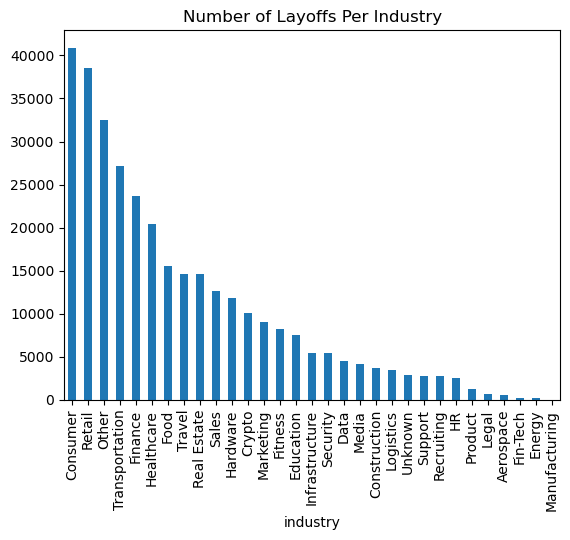

In [289]:
# Lets create a visual to bring this out better. 

import seaborn as sns
import matplotlib.pyplot as plt

number_layoffs = layoffs_industry['total_laid_off'].plot(kind = 'bar', title = 'Number of Layoffs Per Industry')
number_layoffs

<Axes: xlabel='total_laid_off', ylabel='industry'>

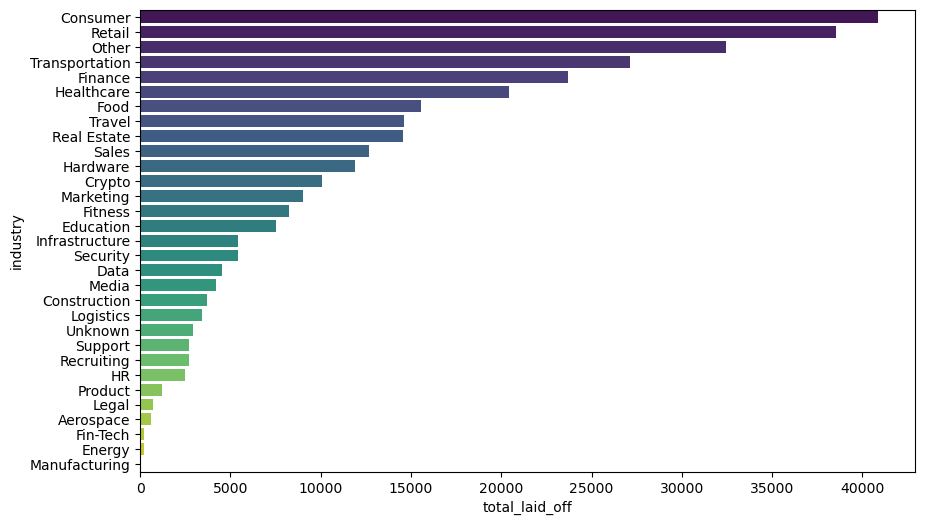

In [406]:
# Or we could utilize seaborn instead which would bring out the same picture but styled differently. 

industry_layoffs = df.groupby('industry').agg({'total_laid_off' : 'sum'}).reset_index()
industry_layoffs = industry_layoffs.sort_values(by = 'total_laid_off', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'total_laid_off', y = 'industry', data = industry_layoffs, palette='viridis')

<Axes: title={'center': 'Percentage Layoffs Per Industry'}, xlabel='industry'>

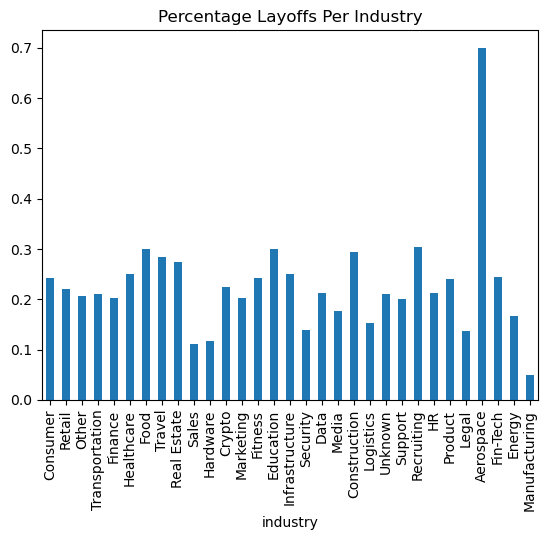

In [291]:
percentage_layoffs = layoffs_industry['percentage_laid_off'].plot(kind = 'bar', title = 'Percentage Layoffs Per Industry')
percentage_layoffs

<Axes: title={'center': 'Layoff Percentage Distribution'}, ylabel='Frequency'>

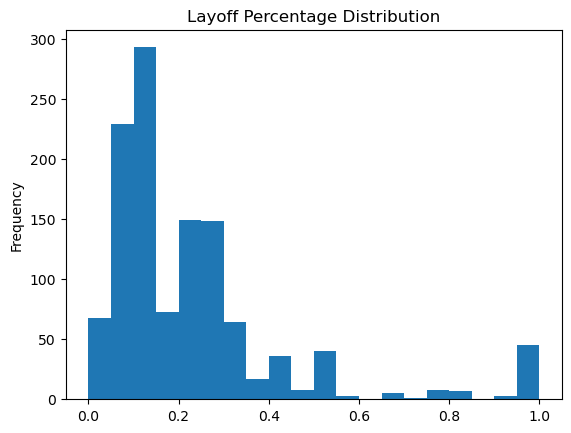

In [295]:
# Lets look more into layoffs by company size and see what could come of it. 

df['percentage_laid_off'].plot(kind = 'hist', bins = 20, title = 'Layoff Percentage Distribution')

# From this, we discovered that most layoffs were clustered between 5% & 35% and theres a bit of an outlier where aveagely 85% of the workforce was laid off by a company/ companies. 

In [302]:
# Lets compare the company stage and the number of lay offs to see if the maturity of the company impacted the number of lay offs. 

df.groupby('stage').agg({'total_laid_off' : 'sum', 'percentage_laid_off' : 'mean'}).sort_values(by = 'total_laid_off', ascending = False)

# This shows us that the more mature comapnies (Post-IPO) laid off more workforce, but smaller companies and those with less workforce sre more likely to get rid of a bigger percentage of their workforce. 

,total_laid_off,percentage_laid_off
stage,,
Post-IPO,191791,0.145994
Unknown,28907,0.253243
Acquired,21422,0.294261
Series D,16398,0.182689
Series C,14154,0.216463
Series B,12397,0.294012
Series E,10131,0.158592
Private Equity,6437,0.127917
Series H,6094,0.136000


In [319]:
# Lets have a look too at the correlation between total and percentage laid off to see if theres really a relationship between one or not. 

df['total_laid_off'].corr(df['percentage_laid_off'])

-0.05775947479091435

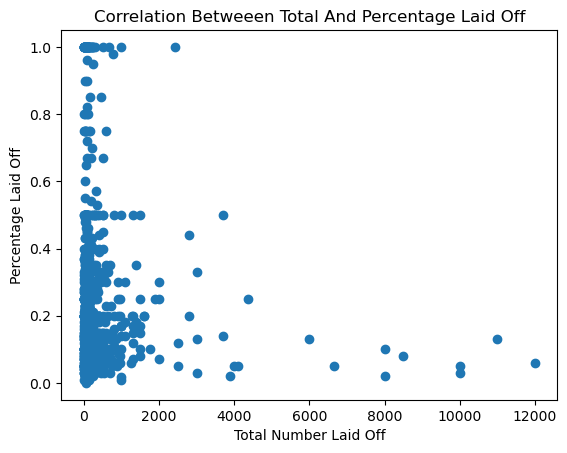

In [321]:
plt.scatter(x = df['total_laid_off'], y = df['percentage_laid_off'])
plt.xlabel('Total Number Laid Off')
plt.ylabel('Percentage Laid Off')
plt.title('Correlation Betweeen Total And Percentage Laid Off')

plt.show()

Text(0.5, 1.0, 'Correlation between Number of Workfoce Laid Off & Percentage')

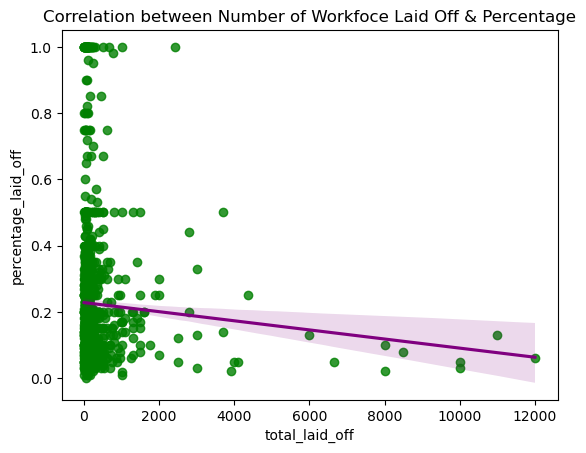

In [461]:
sns.regplot(x = 'total_laid_off', y = 'percentage_laid_off', data = df, scatter_kws = {"color" : "green"}, line_kws = {"color" : "purple"})
plt.title('Correlation between Number of Workfoce Laid Off & Percentage')

# As per the previous cell, we confirm the negative correlation and hence, there is little to no correlation between the total and percentage laid off. There are  companies that lay off a large number of employees, but since they are large companies, the percentage of their workforce being laid off might be relatively small. Conversely, smaller companies might lay off fewer people but a higher percentage of their overall workforce.

In [343]:
# Lets look at the country lay offs. 

df.groupby('country').agg({'total_laid_off' : 'sum', 'percentage_laid_off' : 'mean'}).sort_values(by = 'percentage_laid_off', ascending = False)

# Quite clearly, US, India and Netherlands had the highest number of layoffs but Denmark and Switzerland having a significantly smaller population, they are more affected in terms of a higher percentage of workforce layoffs. 

,total_laid_off,percentage_laid_off
country,,
Denmark,185,0.675000
Switzerland,62,0.500000
Russia,400,0.400000
Australia,1779,0.363500
Portugal,80,0.350000
Myanmar,200,0.330000
Singapore,5935,0.294762
France,643,0.276667
Austria,270,0.270000


In [345]:
#lets have a look at time (over the months) analysis and notice the trend of the layoffs over time. 

df.groupby(df['date'].dt.to_period('M')).agg({'total_laid_off' : 'sum'})

,total_laid_off
date,
2020-03,7628
2020-04,22350
2020-05,24488
2020-06,7023
2020-07,6573
2020-08,1853
2020-09,339
2020-10,110
2020-11,207


<Axes: title={'center': 'Total Layoffs Over Time'}, xlabel='date'>

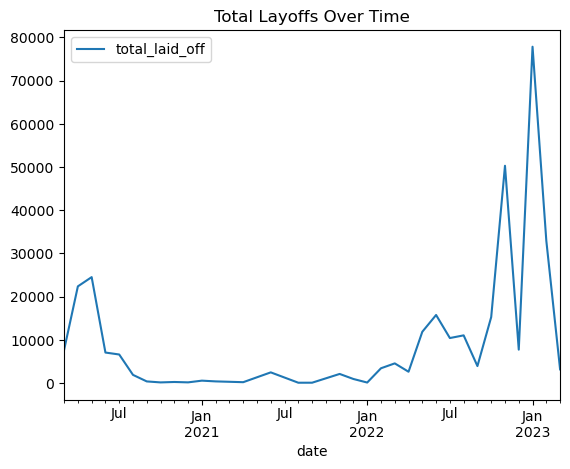

In [351]:
time_layoffs = df.groupby(df['date'].dt.to_period('M')).agg({'total_laid_off' : 'sum'})
time_layoffs.plot(title = 'Total Layoffs Over Time')

In [371]:
# We can display the industries that had the highest number of worforce layoffs in the months that experienced the highest layoffs. 

# Firstly, November, 2022. 

df[(df['date'] >= '2022-11-01') & (df['date'] <= '2022-11-30')].groupby('industry').agg({'total_laid_off' : 'sum'}).sort_values(by = 'total_laid_off', ascending = False).head(5)

,total_laid_off
industry,
Consumer,15380
Retail,11444
Infrastructure,4100
Transportation,3870
Finance,2587


In [373]:
# Secondly, january, 2023. 

df[(df['date'] >= '2023-01-01') & (df['date'] <= '2023-01-31')].groupby('industry').agg({'total_laid_off' : 'sum'}).sort_values(by = 'total_laid_off', ascending = False).head(5)

,total_laid_off
industry,
Other,14489
Consumer,12620
Retail,10729
Sales,8040
Healthcare,7372


In [457]:
# Thirdly, 2020 May. 

df[(df['date'] >= '2020-05-01') & (df['date'] <= '2023-05-31')].groupby('industry').agg({'total_laid_off' : 'sum'}).sort_values(by = 'total_laid_off', ascending = False).head(5)

# what we notice at the end of this analysis is that there are two industrues that that predominantly took a hit each time there was a spike in workforce layoffs; CONSUMER and RETAIL industries. 

,total_laid_off
industry,
Consumer,37209
Retail,33944
Other,32166
Transportation,24878
Finance,21592


In [459]:
# Next, lets find out whether or not there is a relationship between funds raised and total layoffs. 

df['total_laid_off'].corr(df['funds_raised_millions'])

0.09683845868648094

Text(0.5, 1.0, 'Correlation Betweeen Total Laid Off And Funds Raised (millions)')

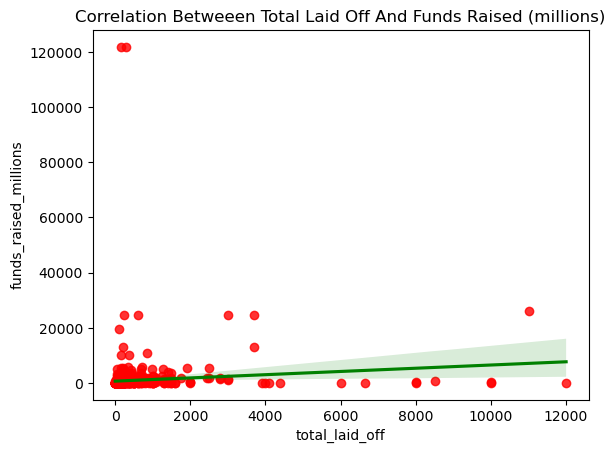

In [412]:

sns.regplot(x = 'total_laid_off', y = 'funds_raised_millions', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "green"})
plt.title('Correlation Betweeen Total Laid Off And Funds Raised (millions)')

# As seen in the visual below, we might have a positive correlation but it being a small figure, that only indicates that the amount of funding a company has raised does not have a strong impact on the likelihood or scale of layoffs.

In [452]:
df['percentage_laid_off'].corr(df['funds_raised_millions'])

-0.06382489376326633

Text(0.5, 1.0, 'Correlation Betweeen Percentage Laid Off And Funds Raised (millions)')

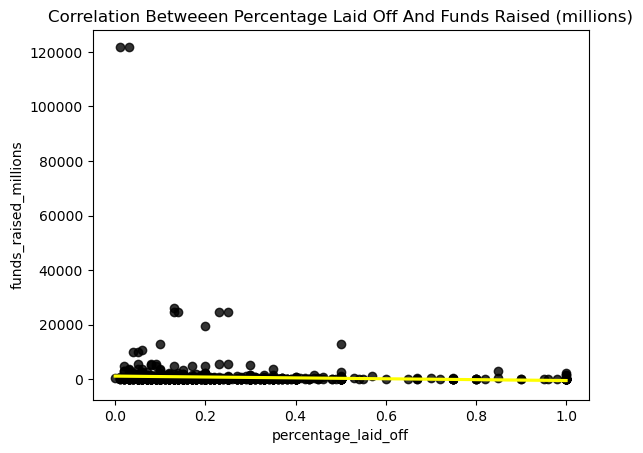

In [418]:
# Having a look at this shows theres no significant correlation between the two and one barely impacts the other. 

sns.regplot(x = 'percentage_laid_off', y = 'funds_raised_millions', data = df, scatter_kws = {"color" : "black"}, line_kws = {"color" : "yellow"})
plt.title('Correlation Betweeen Percentage Laid Off And Funds Raised (millions)')


## Insights and Final Deliverables. 
- The top 5 companies with the hgihest number of layoffs were Google, 	Met, ⦁	Amaz, 
⦁	Micros & 
⦁	Eric and the top 2 industries were Consumer & Retail.
- There is quite generally no significant correlation between company size or funding and layoffs as the figures are to small to instigate any connection to layoffs; this implies other possible factors, for instance, the Covid-19 global pandemic in 2020 could explain the mass layoffs in May that year and an influence by economic downturns, declining stock prices, reduced consumer demand, and AI adoption in 2023 could explain the spikes in January that year.
- Layoffs were low and steady throughout 2021, but increased sharply in 2022, culminating in significant spikes in late 2022 and early 2023 before falling again.on 
